**Import Required Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import zipfile

**Request Access To Google Drive**

*If you want to use this model, you can get the dataset from folder data provided*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Unzip Dataset From Google Drive**

*If you want to use this model, you can get the dataset from folder data provided*

In [ ]:
!unzip gdrive/My\ Drive/WaterLevel.zip

Archive:  gdrive/My Drive/WaterLevel.zip
   creating: WaterLevel/Test/
   creating: WaterLevel/Test/Siaga 1/
  inflating: WaterLevel/Test/Siaga 1/IMG_1081.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1082.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1083.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1084.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1085.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1086.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1087.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1107.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1108.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1109.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1110.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1111.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1112.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1113.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1119.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1120.JPG  
  inflating: WaterLevel/Test/Siaga 1/IMG_1121.JPG  
  infla

In [ ]:
base_dir = './WaterLevel/Train'
os.listdir(base_dir)

['Siaga 3', 'Siaga 1', 'Siaga 4', 'Siaga 2']

In [ ]:
siaga_1 = os.path.join(base_dir, 'Siaga 1')
siaga_2 = os.path.join(base_dir, 'Siaga 2')
siaga_3 = os.path.join(base_dir, 'Siaga 3')
siaga_4 = os.path.join(base_dir, 'Siaga 4')

In [ ]:
os.listdir(siaga_1)[0]

'IMG_1154.JPG'

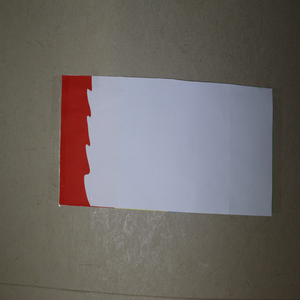

In [ ]:
from PIL import Image

img  = Image.open('./WaterLevel/Train/Siaga 1/IMG_1088.JPG')
img.resize((300, 300), Image.ANTIALIAS)

**Create Machine Learning Model**

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = './WaterLevel/Train'
train_datagen = ImageDataGenerator(rescale=1/255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_dir = './WaterLevel/Validation'
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300, 300),
                                                    class_mode='categorical',
                                                    batch_size=20)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(300, 300),
                                                class_mode='categorical',
                                                batch_size=20)

Found 214 images belonging to 4 classes.
Found 88 images belonging to 4 classes.


In [ ]:
img_height, img_width = 128, 128
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "WaterLevel/Train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "WaterLevel/Validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "WaterLevel/Test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 214 files belonging to 4 classes.
Found 88 files belonging to 4 classes.
Found 160 files belonging to 4 classes.


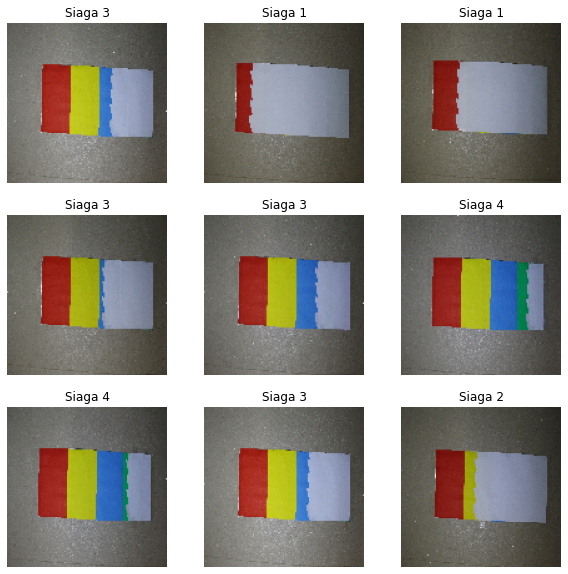

In [ ]:
class_names = ["Siaga 1", "Siaga 2", "Siaga 3", "Siaga 4"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

**Train Machine Learning Model**

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 25s 546ms/step - loss: 70.5314 - accuracy: 0.4813 - val_loss: 1.4981 - val_accuracy: 0.5114
Epoch 2/10
11/11 [==============================] - 13s 515ms/step - loss: 0.2676 - accuracy: 0.9299 - val_loss: 0.3396 - val_accuracy: 0.9318
Epoch 3/10
11/11 [==============================] - 13s 597ms/step - loss: 0.0362 - accuracy: 0.9860 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 4/10
11/11 [==============================] - 12s 506ms/step - loss: 0.0110 - accuracy: 0.9953 - val_loss: 0.2575 - val_accuracy: 0.9773
Epoch 5/10
11/11 [==============================] - 12s 507ms/step - loss: 2.4984e-06 - accuracy: 1.0000 - val_loss: 0.1245 - val_accuracy: 0.9773
Epoch 6/10
11/11 [==============================] - 12s 502ms/step - loss: 1.8175e-06 - accuracy: 1.0000 - val_loss: 0.0822 - val_accuracy: 0.9773
Epoch 7/10
11/11 [==============================] - 12s 517ms/step - loss: 3.8102e-07 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.97

**See Machine Learning Model Accuracy**




In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 8s 11ms/step - loss: 0.3265 - accuracy: 0.9312


[0.32650911808013916, 0.9312499761581421]

**See The Result Of The Training Model**

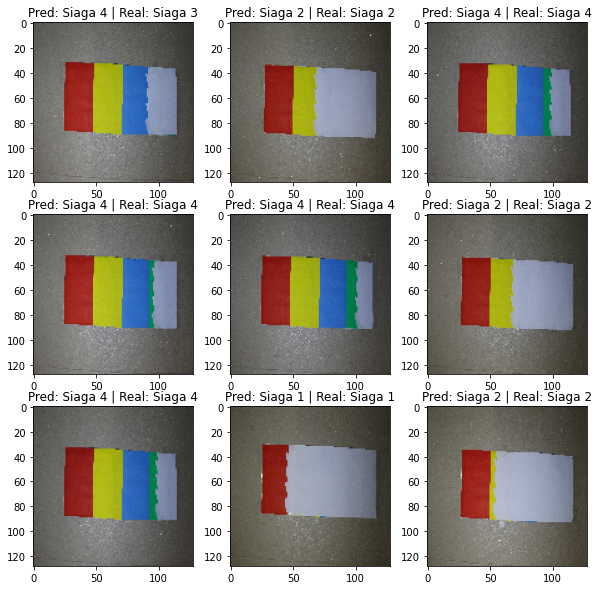

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

**Download Model Machine Learning To Use in Android Studio**

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpep0p6d3q/assets


INFO:tensorflow:Assets written to: /tmp/tmpep0p6d3q/assets
